## Fouls Committed Visualization

This notebook walks the user through the creation of the Fouls Commited visualization.  The goal of this visualization is to quickly inform the user about fouls commited by team.  A pie chart was choosen because it is a common, easy to understand by layman visulazation.

Image your watching the game and the referee just blew his wistle for a fould AGAIN!  The game is really getting out of hand and you want to know which team is more of the aggressor.  You quickly check the pie chart and return your attention to the game before the free kick is taken.

The 2015 Women's World Cup Final game is used in this notebook

In [82]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline 

In [83]:
WWC = pd.read_csv('usa-japan.csv')
WWC["SecInGame"]=WWC['period_min']*60+WWC['period_second']
WWC.sort('SecInGame', inplace=True)

In [84]:
Home = int(WWC['home_team'].unique()[0][1:])
Away = int(WWC['away_team'].unique()[0][1:])

TeamName={Home:WWC[WWC['team_id']==Home]['team'].unique()[0],
         Away:WWC[WWC['team_id']==Away]['team'].unique()[0]}


We will start by building the visualization assuming the game has already been played.

In [85]:
totalFouls=(WWC[(WWC['event_type_id']==4)].shape[0])/2
homeTeamCommitedFoul=WWC[(WWC['event_type_id']==4)& (WWC['outcome']==0)& (WWC['team_id']==Home)]['event_id'].count()
awayTeamCommitedFoul=totalFouls-homeTeamCommitedFoul

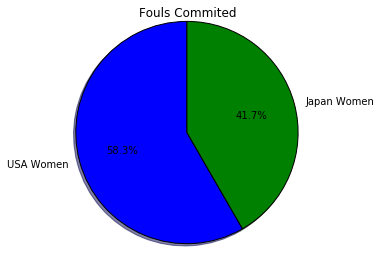

In [86]:
labels=[TeamName[Home],TeamName[Away]]
sizes=[homeTeamCommitedFoul,awayTeamCommitedFoul]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fouls Commited')
plt.show()

## "Mock up of Streaming"

This is a mock-up of how the visualization would appear if streaming along with the game in our Fan Experience Broadcast

In [87]:
def Foul_chart(homeTeamCommitedFoul,awayTeamCommitedFoul):
    labels=[TeamName[Home],TeamName[Away]]
    sizes=[homeTeamCommitedFoul,awayTeamCommitedFoul]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Fouls Commited')
    plt.show()
    
def Update_chart(currentGameTime):
    currentGameTimeSeconds=currentGameTime*60
    Stream=WWC[(WWC['SecInGame']<currentGameTimeSeconds)&(WWC['event_type_id']==4)].copy()
    totalFouls=Stream.shape[0]/2
    homeTeamCommitedFoul=Stream[(Stream['outcome']==0)& (Stream['team_id']==Home)]['event_id'].count()
    awayTeamCommitedFoul=totalFouls-homeTeamCommitedFoul
    Foul_chart(homeTeamCommitedFoul,awayTeamCommitedFoul)

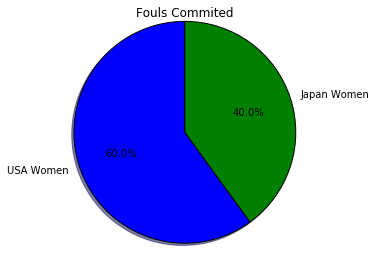

In [88]:
## variable input
currentGameTime = 25 #minutes

Update_chart(currentGameTime)

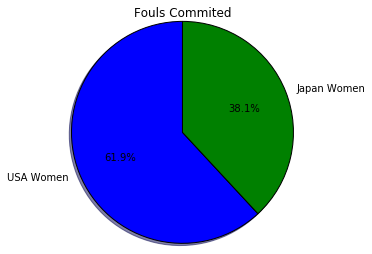

In [89]:
## variable input
currentGameTime = 80 #minutes

Update_chart(currentGameTime)